# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice Problems</a></div><div class="lev2 toc-item"><a href="#2E1." data-toc-modified-id="2E1.-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2E1.</a></div><div class="lev2 toc-item"><a href="#2E2." data-toc-modified-id="2E2.-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2E2.</a></div><div class="lev2 toc-item"><a href="#2E3." data-toc-modified-id="2E3.-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>2E3.</a></div><div class="lev2 toc-item"><a href="#2E4." data-toc-modified-id="2E4.-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>2E4.</a></div><div class="lev2 toc-item"><a href="#2M1." data-toc-modified-id="2M1.-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>2M1.</a></div><div class="lev2 toc-item"><a href="#2M2." data-toc-modified-id="2M2.-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>2M2.</a></div><div class="lev2 toc-item"><a href="#2M3." data-toc-modified-id="2M3.-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>2M3.</a></div><div class="lev2 toc-item"><a href="#2M4." data-toc-modified-id="2M4.-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>2M4.</a></div><div class="lev2 toc-item"><a href="#2M5." data-toc-modified-id="2M5.-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>2M5.</a></div><div class="lev2 toc-item"><a href="#2M6." data-toc-modified-id="2M6.-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>2M6.</a></div><div class="lev2 toc-item"><a href="#2M7." data-toc-modified-id="2M7.-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>2M7.</a></div><div class="lev2 toc-item"><a href="#2H1." data-toc-modified-id="2H1.-112"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>2H1.</a></div><div class="lev2 toc-item"><a href="#2H2." data-toc-modified-id="2H2.-113"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>2H2.</a></div><div class="lev2 toc-item"><a href="#2H3." data-toc-modified-id="2H3.-114"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>2H3.</a></div><div class="lev2 toc-item"><a href="#2H4." data-toc-modified-id="2H4.-115"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>2H4.</a></div>

## Import Statements

In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def posterior_grid_approx(prior, success=6, tosses=9):
    """
        This function helps calculate a grid approximation of the posterior distribution.
        
        Parameters:
            prior: np.array
                A distribution representing our state of knowledge before seeing the data.
                Number of items should be the same as number of grid points.
                
            success: integer
                Number of successes.
            
            tosses: integer
                Number of tosses (i.e. successes + failures).
                
        Returns: 
            p_grid: np.array
                Evenly-spaced out grid between 0 and 1.
                
            posterior: np.array
                The posterior distribution.
            
    """
    # define grid
    p_grid = np.linspace(0, 1, prior.shape[0])

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

def grid_approx_plot(
    w=6, 
    n=9,
    prior=np.repeat(5,100),
    x_label='probability of water'
):
    """
        This function helps calculate a grid approximation of the posterior distribution,
        and then plots it.
        
        Parameters:
            prior: np.array
                A distribution representing our state of knowledge before seeing the data.
                Number of items should be the same as number of grid points.
                
            w: integer
                Number of successes.
            
            n: integer
                Number of trials.
            
    """
    p_grid, posterior = posterior_grid_approx(
        success=w,
        tosses=n,
        prior=prior
    )
    plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
    plt.xlabel(x_label)
    plt.ylabel('posterior probability')
#     plt.title('{} points'.format(points))
    plt.legend(loc=0)
    
    return p_grid, posterior

# Practice Problems

## 2E1. 

Which of the expressions below correspond to the statement: _the probability of rain on Monday_?

(1) $Pr(rain)$
* Nope. This is the averaged probability of rain. 

(2) $Pr(rain\mid Monday)$
* Yes. Given that it is Monday, what is the probability of rain?

(3) $Pr(Monday \mid rain)$
* No. This is the probability of being Monday given that it is raining.

(4) $Pr(rain, Monday) / Pr(Monday)$
* Yes. This is equivalent to the second option.

## 2E2. 

Which of the expressions below correspond to the expression: $Pr(Monday \mid rain)$?

(1) The probability of rain on Monday.
* No. This is $Pr(rain \mid Monday)$.
    
(2) The probability of rain, given that it is Monday.
* No. This is $Pr(rain \mid Monday)$.
    
(3) The probability that it is Monday, given that it is raining.
* Yes. This is $Pr(Monday \mid rain)$.

(4) The probability that it is Monday and that it is raining.
* No. This is $Pr(Monday, rain)$.

## 2E3. 

Which of the expressions below correspond to the statement:  _the probability that it is Monday, given that it is raining_?

(1) $Pr(Monday \mid rain)$
* Yes. By definition.
    
(2) $Pr(rain \mid Monday)$
* No. This is probability of rain given that it is a Monday.
    
(3) $Pr(rain\mid Monday)Pr(Monday)$
* No. This is equivalent to $Pr(rain, Monday)$, or the probability that it is raining and it is Monday.

(4) $Pr(rain\mid Monday)Pr(Monday) / Pr(rain)$
* This is equivalent to $Pr(rain, Monday) / Pr(rain)$, which then simplifies to $Pr(Monday \mid rain)$. So yes.

(5) $Pr(Monday \mid rain)Pr(rain) / Pr(Monday)$
* This simplifies to $Pr(Monday, rain) / Pr(Monday) = Pr(rain \mid Monday)$, so nope.

## 2E4. 

The Bayesian statistician Bruno de Finetti (1906-1985) began his book on probability theory with the declaration: "PROBABILITY DOES NOT EXIST." The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. What he meant is that probabilty is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say "the probability of water is 0.7?"

Ans:

I think he meant that probability only exists in the "small world." It represents a person's state of uncertainty on some aspect of the real world. For example, in the real world, water is objectively some proportion of the whole Earth. The true proportion of water in Earth is probably some precise number, for example: 0.712345678... However, when a Bayesian says that "the probability of water is 0.7," this implies that this person _believes_ the ratio is about 0.7. The person is betting that the ratio is close to 0.7.

## 2M1.

Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior _p_.

(1) W,W,W

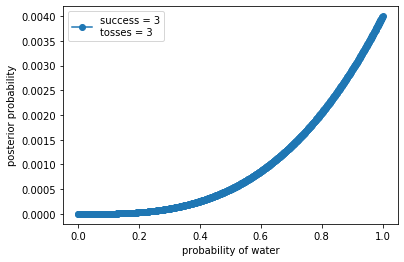

In [3]:
_, _ = grid_approx_plot(n=3,w=3, prior=np.repeat(5,int(1e3)) )

(2) W,W,W,L

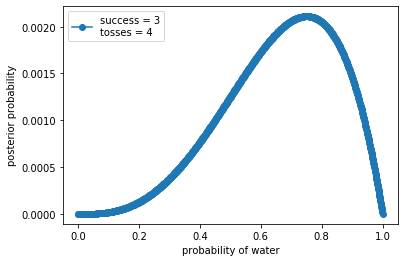

In [4]:
_,_ = grid_approx_plot(n=4, w=3, prior=np.repeat(5,int(1e3)) )

(3) L,W,W,L,W,W,W

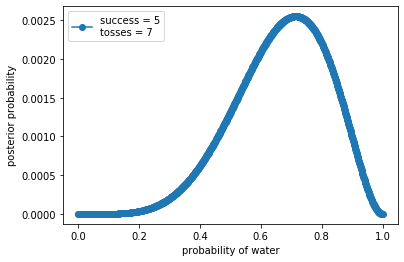

In [5]:
_, _ = grid_approx_plot(n=7, w=5, prior=np.repeat(5,int(1e3)))

## 2M2.

Now assume a prior for _p_ that is equal to zero when $p < 0.5$ and is a positive constant when $p >= 0.5$. Again, compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

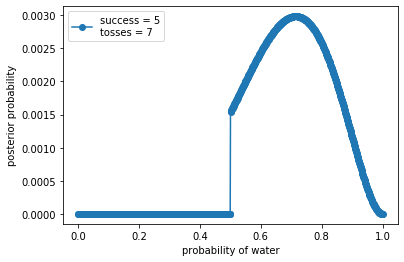

In [6]:
_, _ = grid_approx_plot(
    n=7,
    w=5,
    prior=( np.linspace(0, 1, int(1e3)) >= 0.5).astype(int))

## 2M3.

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes--you don't know which--was tossed in the air and produced a "land" observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing "land" $Pr(\text{Earth}\mid\text{land})$ is 0.23.

$Pr(\text{water} \mid \text{Earth}) = 0.7$

$Pr(\text{land} \mid \text{Earth}) = 0.3$

$Pr(\text{Earth}) = 0.5$

$Pr(\text{land} \mid \text{Mars}) = 1.0$

$Pr(\text{Mars}) = 0.5$

\begin{equation}
\begin{aligned}
    Pr(\text{land}) &= Pr(\text{land} \mid \text{Earth})Pr(\text{Earth}) + Pr(\text{land} \mid \text{Mars})Pr(\text{Mars}) \\
    &= 0.3 * 0.5 + 1.0 * 0.5 \\
    &= 0.65
\end{aligned}
\end{equation}


\begin{equation}
\begin{aligned}
    Pr(\text{Earth} \mid \text{land}) &= \frac{0.3 * 0.5}{0.65} \\
    &= 0.23 \\
\end{aligned}
\end{equation}






## 2M4.

Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don't know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

Note: $B$ stands for black and $W$ stands for white. $B_1$ means that side 1 of a card is black. The left side is the side facing up (e.g. $B_2 \mid B_1$ means that the second side is black and it is the one facing up, while the other side is also black).

Here are the combinations:

$B_1 \mid B_2$ Black side is facing up and other side is black

$B_2 \mid B_1$ Black side is facing up and other side is black

$B_1 \mid W_2$ Black side is facing up, but other side is white.

$W_2 \mid B_1$ Not relevant, since white side up.

$W_1 \mid W_2$ Not relevant, since white side up.

$W_2 \mid W_1$ Not relevant, since white side up.

There are three events consistent with "Black side facing up," and only two of them are consistent with the the event "other side is also black." Thus the probability that the other side is black, given that the known side is black is $2/3$.

## 2M5. 

Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

Previously:

$B_1 \mid B_2$ Black side is facing up and other side is black

$B_2 \mid B_1$ Black side is facing up and other side is black

$B_1 \mid W_2$ Black side is facing up, but other side is white.

$W_2 \mid B_1$ Not relevant, since white side up.

$W_1 \mid W_2$ Not relevant, since white side up.

$W_2 \mid W_1$ Not relevant, since white side up.

New Data:

$B_1 \mid B_2$ Black side is facing up and other side is black

$B_2 \mid B_1$ Black side is facing up and other side is black

There are now five events consistent with "Black side facing up," and four of them are consistent with the the event "other side is also black," so the probability of the other side being black, given that the side being shown is black is $4/5$.

## 2M6.

Imagine that the black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it's less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

A probabilistically equal statement to this is if we pretend to have the bag have one $B/B$ card, two $B/W$ and three $W/W$ card in the bag.

$B/B$ gives us two ways of picking a black side up: $B_1 / B_2$ and $B_2 / B_1$.

If we pick one of the $B/W$ cards, there is one way that a card has black side up: $B_1$. However, because picking up a $B/W$ is twice as likely as picking up a $B/B$, then there are $2\times 1 = 2$ ways to get a card where we know that one side is black.

There are $4$ total ways of picking a black card, but only half of them has black on the other side. Therefore the probability that the other side is black, given that a black side is face up, is 0.5.

## 2M7. 

Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

$B_1 \mid B_2$ -> $W_1 \mid B_2$ Black on the other side.

$B_1 \mid B_2$ -> $W_1 \mid W_2$ Black on the other side.

$B_1 \mid B_2$ -> $W_2 \mid W_1$ Black on the other side.

$B_2 \mid B_1$ -> $W_1 \mid B_2$ Black on the other side.

$B_2 \mid B_1$ -> $W_1 \mid W_2$ Black on the other side.

$B_2 \mid B_1$ -> $W_2 \mid W_1$ Black on the other side.

$B_1 \mid W_2$ -> $W_1 \mid W_2$ Not black on the other side.

$B_1 \mid W_2$ -> $W_2 \mid W_1$ Not black on the other side.

Given that the second card has white face-up and the first card has black face-up, the probability that the first card's other side is black is 0.75.


## 2H1. 

Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

Note: $C_1=2$ stands for twins during the first birthing event, $C_2=1$ stands for a singleton infant during the second birthing event. $S=a$ means that the species which gave birth was from Species A.

$P(C_1=2 \mid S=a) = 0.1$

$P(C_1=1 \mid S=a) = 0.9$

$P(C_1=2 \mid S=b) = 0.2$

$P(C_1=1 \mid S=b) = 0.8$

$P(S=a) = 0.5$

$P(S=b) = 0.5$

$$
\begin{equation}
    \begin{aligned}
        P(S=a \mid C_1=2) &= \frac{P(C_1=2 \mid S=a)P(S=a)}{P(C_1=2)} \\
        &= \frac{0.05}{0.05+0.1} \\
        &= \frac{1}{3} \\
    \end{aligned}
\end{equation}
$$

$$
\begin{equation}
    \begin{aligned}
        P(S=b \mid C_1=2) &= 1 - P(S=a \mid C_1=2) \\
        &= \frac{2}{3}
    \end{aligned}
\end{equation}
$$

$$
\begin{equation}
    \begin{aligned}
        P(C_2=2 \mid C_1=2) &= \sum_S P(C_2=2, S, \mid C_1=2) \\
        &= P(C_2=2, S=a \mid C_1=2) + P(C_2=2, S=b \mid C_1=2) \\
        &= P(C_2=2 \mid S=a, C_1=2) \cdot P(S=a \mid C_1=2) \\ 
        &\quad+ P(C_2=2 \mid S=b, C_1=2) \cdot P(S=b \mid C_1=2) \\
        &= P(C_2=2 \mid S=a) \cdot P(S=a \mid C_1=2) \\
        &\quad+ P(C_2=2 \mid S=b) \cdot P(S=b \mid C_1=2) & \text{Conditional independence. See Note below}\\
        &= \frac{1}{10} \times \frac{1}{3} + \frac{2}{10} \times \frac{2}{3} \\
        &= \frac{1}{30} + \frac{4}{30} \\ 
        &= \frac{1}{6}
    \end{aligned}
\end{equation}
$$

_Note_: The causal diagram implied here is the following:

![Species influences Births at Time 1 and Time 2](./img/species-birthing.png)

The causal diagram implies that if we already know the Species ($S$), then Birth at Time 1 ($C_1$) and Birth at Time 2 ($C_2$) are independent from each other. In mathematical notation:

$$ C_2 \mathrel{\unicode{x2AEB} C_1 \mid S}$$


In other words, if we know the species, knowing about the birth at time 1 does not give us any more information about birth at time 2. Therefore, we have the license to remove $C_1$ from the conditioning section:

$$
\begin{equation}
    \begin{aligned}
         P(C_2=2 \mid S=a, C_1=2) &= P(C_2=2 \mid S=a) \\
         P(C_2=2 \mid S=b, C_1=2) &= P(C_2=2 \mid S=b) \\
    \end{aligned}
\end{equation}
$$

## 2H2. 

Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

$$
\begin{equation}
    \begin{aligned}
        P(S=a \mid C_1=2) &= \frac{P(C_1=2 \mid S=a)P(S=a)}{P(C_1=2)} \\
        &= \frac{0.05}{0.05+0.1} \\
        &= \frac{1}{3} \\
    \end{aligned}
\end{equation}
$$

## 2H3.

Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

$$
\begin{equation}
    \begin{aligned}
        P(S=a \mid C_2=1, C_1=2) &= \frac{P(C_2=1, C_1=2 \mid S=a)P(S=a)}{P(C_2=1, C_1=2)} \\
        &= \frac{P(C_2=1 \mid S=a)P(C_1=2 \mid S=a)P(S=a)}{P(C_2=1, C_1=2)} \\
        &= \frac{P(C_2=1 \mid S=a)P(C_1=2 \mid S=a)P(S=a)}{P(C_2=1 \mid S=a)P(C_1=2 \mid S=a)P(S=a) + P(C_2=1 \mid S=b)P(C_1=2 \mid S=b)P(S=b)} \\
        &= \frac{0.9 \times 0.1 \times 0.5}{0.9 \times 0.1 \times 0.5 + 0.8 \times 0.2 \times 0.5} \\
        &= 0.36
    \end{aligned}
\end{equation}
$$



## 2H4.

A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This in the information you have about the test:

* The probability it correctly identifies a species A panda is 0.8.
* The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation now using the birth data as well.

Let $T$ stand for the test result.

$P(T=a \mid S=a) = 0.8$

$P(T=b \mid S=b) = 0.65$, therefore: $P(T=a \mid S=b) = 0.35$.

Without birth data:

$$
\begin{equation}
    \begin{aligned}
        P(S=a \mid T=a) &= \frac{P(T=a \mid S=a)P(S=a)}{P(T=a)} \\
        &= \frac{P(T=a \mid S=a)P(S=a)}{P(T=a \mid S=a)P(S=a) + P(T=a \mid S=b)P(S=b)} \\
        &= \frac{0.8 \times 0.5}{0.8 \times 0.5 + 0.35 \times 0.5} \\
        &= \frac{0.8}{1.15} \\
        &\approx 0.70
    \end{aligned}
\end{equation}
$$

With birth data:

We use the posterior of the previous answer $P(S=a \mid C_2=1, C_1=2) = 0.36$ as the new prior $P(S=a)$:

$$
\begin{equation}
    \begin{aligned}
        P(S=a \mid T=a) &= \frac{P(T=a \mid S=a)P(S=a)}{P(T=a)} \\
        &= \frac{P(T=a \mid S=a)P(S=a)}{P(T=a \mid S=a)P(S=a) + P(T=a \mid S=b)P(S=b)} \\
        &= \frac{0.8 \times 0.36}{0.8 \times 0.36 + 0.35 \times 0.64} \\
        &\approx 0.56
    \end{aligned}
\end{equation}
$$

